# Assignment No : 4


Q.Consider the Bangalore House Price Data. Perform following operations.

In [55]:
import pandas as pd
#Load the dataset 
df = pd.read_csv("/home/vaishnavi/notebook/Banglore Housing Prices - Banglore Housing Prices.csv")
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00



a) Find and replace null values in the data using appropriate technique.

In [56]:
#find the total Null values
df.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [57]:
#drop the rows with null Values
df.dropna(inplace = True)
df

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00
...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453,4.0,231.00
13316,Richards Town,4 BHK,3600,5.0,400.00
13317,Raja Rajeshwari Nagar,2 BHK,1141,2.0,60.00
13318,Padmanabhanagar,4 BHK,4689,4.0,488.00


In [58]:
#null values removed
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

b) Transform the ‘Size’ column to numerical values. For Example: 2 BHK to be converted as 2

In [59]:
df['size']

0            2 BHK
1        4 Bedroom
2            3 BHK
3            3 BHK
4            2 BHK
           ...    
13315    5 Bedroom
13316        4 BHK
13317        2 BHK
13318        4 BHK
13319        1 BHK
Name: size, Length: 13246, dtype: object

In [60]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [61]:
#lambda is a small anonymous function where x is argument
#split() function separate dataframe columns based on a separator or delimiter
df['bhk'] = df['size'].apply(lambda x : int(x.split(' ')[0]))
df.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [62]:
#using a fun function
def fun(x):
    return int(x.split(' ')[0])

df['Bhk_new'] = df['size'].apply(fun)
df.head()

,location,size,total_sqft,bath,price,bhk,Bhk_new
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3,3
4,Kothanur,2 BHK,1200,2.0,51.00,2,2


c) Transform the ‘total_sqft’ column to contain numerical values on same scale. If the range is given average value of the range to be taken.

In [63]:
df['total_sqft']

0        1056
1        2600
2        1440
3        1521
4        1200
         ... 
13315    3453
13316    3600
13317    1141
13318    4689
13319     550
Name: total_sqft, Length: 13246, dtype: object

In [64]:
#try to convert value into float if not so the return false
def flt(x):
    try:
        float(x)
    except:
        return False
    return True

In [65]:
#row with not float values
df[~df['total_sqft'].apply(flt)]

,location,size,total_sqft,bath,price,bhk,Bhk_new
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2,2
...,...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2,2


In [66]:
#finding the avegare of the given range
def avg_range(x):
    num = x.split('-')
    if len(num) == 2:
        avg_num = (float(num[0])+float(num[1]))/2
        return avg_num
    try:
        return float(x)
    except:
        return None
    
    

In [67]:
df['total_sqft']=df['total_sqft'].apply(avg_range)
df

,location,size,total_sqft,bath,price,bhk,Bhk_new
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2
...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,5
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,4
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,2
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,4


In [68]:
df.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Bhk_new               4
Name: 30, dtype: object

In [69]:
df.isnull().sum()

location       0
size           0
total_sqft    46
bath           0
price          0
bhk            0
Bhk_new        0
dtype: int64

In [70]:
df.dropna(inplace = True)

In [71]:
df.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
bhk           0
Bhk_new       0
dtype: int64

In [72]:
#StandardScaler removes the mean and scales each feature/variable to unit variance
from sklearn.preprocessing import StandardScaler

scale = df['total_sqft'].values.reshape(-1,1)

In [73]:
scl = StandardScaler()
model = scl.fit(scale)
scl_data = model.transform(scale)

In [74]:
scl_data

array([[-0.40354986],
       [ 0.84435221],
       [-0.09319079],
       ...,
       [-0.33485058],
       [ 2.53273785],
       [-0.81251258]])

#d) Calculate and add one more column as ‘Price_Per_Sqft’


In [75]:
#convert the price into lakh then divide it by total_sqft
df['Price_Per_Sqft'] = (df['price']*100000)/df['total_sqft']
df

,location,size,total_sqft,bath,price,bhk,Bhk_new,Price_Per_Sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,2,4250.000000
...,...,...,...,...,...,...,...,...
13315,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,5,6689.834926
13316,Richards Town,4 BHK,3600.0,5.0,400.00,4,4,11111.111111
13317,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,2,5258.545136
13318,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,4,10407.336319


e) Remove the outliers from Price_Per_Sqft and BHK Size column if any.

In [76]:
import seaborn as sns
import numpy as np

<Axes: >

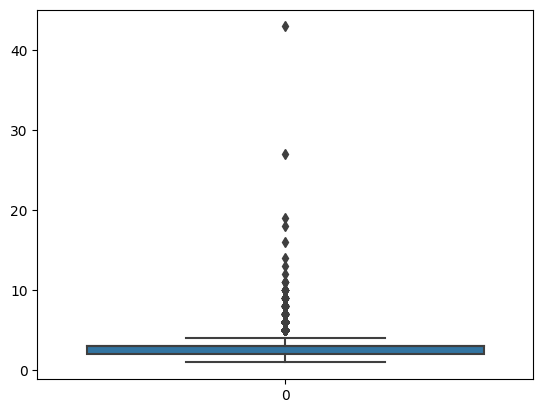

In [77]:
sns.boxplot(df['bhk'])

In [78]:
#finding outliers
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
bhk_outliers = detect_outliers_iqr(df['bhk'])
print("Outliers from IQR method: ", bhk_outliers)

Outliers from IQR method:  [5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 

In [79]:
#find the uppeer bound and lower bound deticating outliers
Q1=df['bhk'].quantile(0.25)
Q3=df['bhk'].quantile(0.75)
IQR=Q3-Q1
print('Q1 :- ',Q1)
print('Q3 :- ',Q3)
print('IQR :- ',IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('Lower_Whisker :',Lower_Whisker)
print('Upper_Whisker :',Upper_Whisker)

Q1 :-  2.0
Q3 :-  3.0
IQR :-  1.0
Lower_Whisker : 0.5
Upper_Whisker : 4.5


In [80]:
#remove outliers
df = df[(df['bhk']< Upper_Whisker) & (df['bhk']>Lower_Whisker)]

<Axes: >

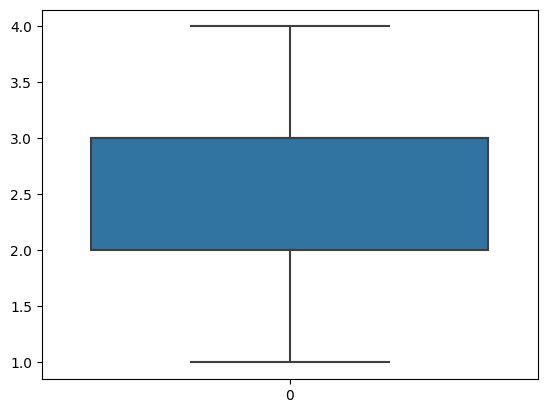

In [81]:
sns.boxplot(df['bhk'])

In [82]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers
bhk_outliers = detect_outliers_iqr(df['bhk'])
print("Outliers from IQR method: ", bhk_outliers)

Outliers from IQR method:  []


<Axes: >

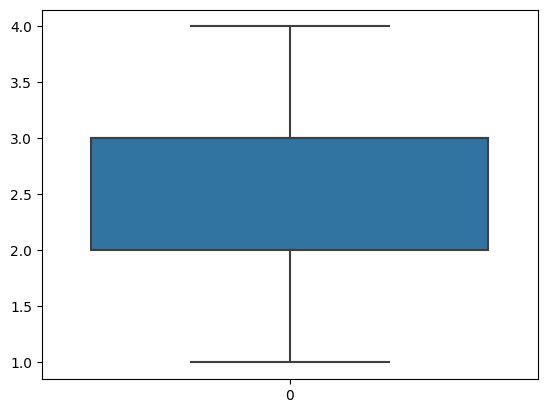

In [83]:
sns.boxplot(df['bhk'])

<Axes: >

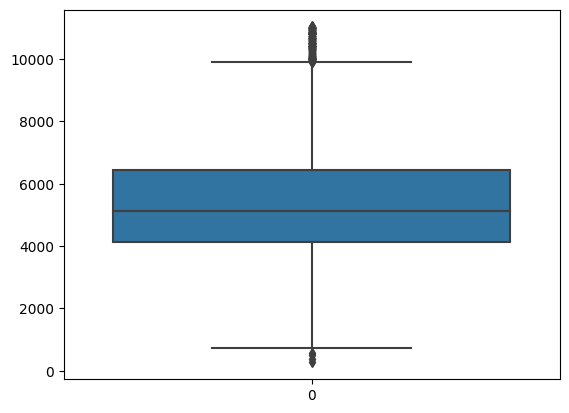

In [90]:
sns.boxplot(df['Price_Per_Sqft'])

In [105]:
Q1=df['Price_Per_Sqft'].quantile(0.25)
Q3=df['Price_Per_Sqft'].quantile(0.75)
IQR=Q3-Q1
print('Q1 :- ',Q1)
print('Q3 :- ',Q3)
print('IQR :- ',IQR)
Lower_Whisker = Q1-1.5*IQR
Upper_Whisker = Q3+1.5*IQR
print('Lower_Whisker :',Lower_Whisker)
print('Upper_Whisker :',Upper_Whisker)

Q1 :-  4096.385542168675
Q3 :-  6250.0
IQR :-  2153.614457831325
Lower_Whisker : 865.9638554216872
Upper_Whisker : 9480.421686746988


In [106]:
df = df[(df['Price_Per_Sqft']<= Upper_Whisker)]

In [107]:
df = df[(df['Price_Per_Sqft']>= Lower_Whisker)]

In [108]:
#np.where(conditon,true,fasle)

new_df_cap = df.copy()

new_df_cap['Price_Per_Sqft']=np.where(
    new_df_cap['Price_Per_Sqft'] >= Upper_Whisker,
    Upper_Whisker,
    np.where(
        new_df_cap['Price_Per_Sqft']<= Lower_Whisker,
        Lower_Whisker,
        new_df_cap['Price_Per_Sqft']
    )
)

<Axes: >

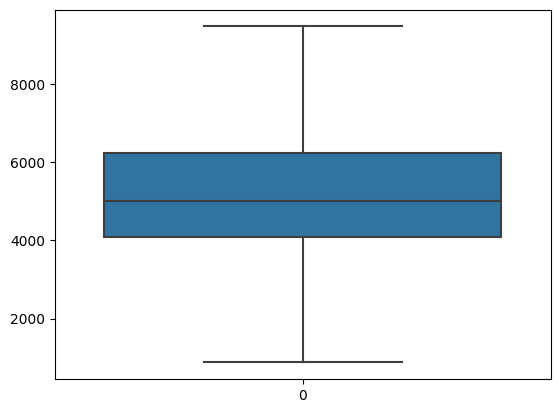

In [109]:
sns.boxplot(df['Price_Per_Sqft'])

In [110]:
df.describe()

,total_sqft,bath,price,bhk,Bhk_new,Price_Per_Sqft
count,10915.000000,10915.000000,10915.000000,10915.000000,10915.000000,10915.000000
mean,1428.190526,2.365277,77.824924,2.475492,2.475492,5251.187591
std,823.247281,0.790070,55.915754,0.705108,0.705108,1530.162609
min,276.000000,1.000000,8.000000,1.000000,1.000000,875.000000
25%,1099.500000,2.000000,46.000000,2.000000,2.000000,4094.488189
50%,1255.000000,2.000000,64.000000,2.000000,2.000000,5022.831050
75%,1577.000000,3.000000,90.000000,3.000000,3.000000,6250.000000
max,36000.000000,8.000000,2100.000000,4.000000,4.000000,9480.337079


f) Apply the Linear Regression model to the data and display the training and testing performance measures 
as Mean Squared Error
and Accuracy

In [111]:
import matplotlib.pyplot as plt
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk', 'Bhk_new',
       'Price_Per_Sqft'],
      dtype='object')

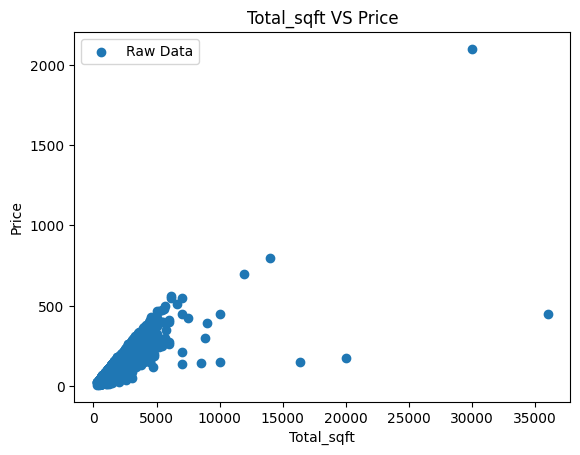

In [112]:
import matplotlib.pyplot as plt
total_sqft = df['total_sqft']
price = df['price']
plt.scatter(total_sqft,price, label='Raw Data')
plt.title('Total_sqft VS Price')
plt.xlabel('Total_sqft')
plt.ylabel('Price')
plt.legend()

In [113]:
x=df['total_sqft']
y=df['price']

In [114]:
from scipy import stats
slope, intercept, r, p, std_err = stats.linregress(x, y)

In [115]:
def Linearfunc(x):
    return slope * x + intercept

mymodel = list(map(Linearfunc, x))

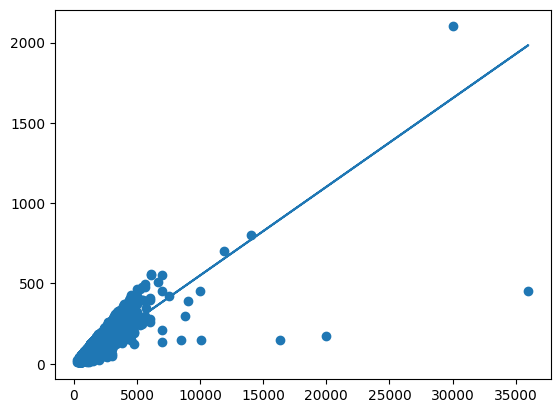

In [116]:
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()

In [117]:
from sklearn.model_selection import train_test_split
x = df.drop(['location','price','size'],axis = 1)
y = df['price']

In [118]:
#traing and testing data
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state = 2)

In [119]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [120]:
lr.fit(X_train,y_train)

LinearRegression()

In [121]:
#finding the y_train_pred  and y_test_pred
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

y_train_pred

array([ 67.51081252, 120.98629474,  69.33764282, ...,  47.76253861,
        74.26901588,  88.76022322])

In [122]:
y_test_pred

array([ 93.27228381,  62.55861899,  49.03264137, ...,  48.61244958,
       134.11170883,  85.68034248])

In [123]:
#finding mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

mse_train = mean_squared_error(y_train,y_train_pred)
mse_test = mean_squared_error(y_test,y_test_pred)

In [124]:
r2_train = r2_score(y_train,y_train_pred)
r2_test = r2_score(y_test,y_test_pred)

In [125]:
print('Training mean squared error : {:.2f}'.format(mse_train))
print('Testing mean squared error : {:.2f}'.format(mse_test))
print('Training Accuracy : {:.2f}'.format(r2_train))
print('Testing Accuracy : {:.2f}'.format(r2_test))

Training mean squared error : 382.33
Testing mean squared error : 681.65
Training Accuracy : 0.86
Testing Accuracy : 0.85


In [126]:
lr.coef_

array([ 0.03512657, 11.69518838,  1.56411505,  1.56411505,  0.01579427])

In [127]:
lr.intercept_

-90.8327990535986

In [85]:
lr.predict([[3200.0,1.0,2,2,3818.181818]])

/home/vaishnavi/.local/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([65.89477395])